In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the Iris dataset
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

In [ ]:
# One-hot encoding for classification
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,
test_size=0.3, random_state=42)

In [ ]:
# Activation functions and their derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))
def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x) ** 2
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

In [ ]:
# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size,
activation='sigmoid'):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # Select activation
        if activation == 'sigmoid':
            self.act = sigmoid
            self.act_deriv = sigmoid_deriv
        elif activation == 'tanh':
            self.act = tanh
            self.act_deriv = tanh_deriv
        elif activation == 'relu':
            self.act = relu
            self.act_deriv = relu_deriv
        else:
            raise ValueError("Unsupported activation function")

        self.activation_name = activation

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.act(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer uses sigmoid for multi-class
        return self.a2

    def backward(self, X, y, output, lr=0.1):
        output_error = output - y
        dW2 = self.a1.T @ (output_error * sigmoid_deriv(self.z2))
        db2 = np.sum(output_error * sigmoid_deriv(self.z2), axis=0,
keepdims=True)

        hidden_error = (output_error @ self.W2.T) * self.act_deriv(self.z1)
        dW1 = X.T @ hidden_error
        db1 = np.sum(hidden_error, axis=0, keepdims=True)

        # Update weights
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2

    def train(self, X, y, epochs=500, lr=0.1):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, lr)
            loss = np.mean((y - output) ** 2)
            loss_history.append(loss)
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

In [ ]:
# Train and compare models with different activation functions
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for act in activations:
    print(f"\nTraining with activation: {act}")
    nn = NeuralNetwork(4, 8, 3, activation=act)
    loss_hist = nn.train(X_train, y_train, epochs=500, lr=0.1)
    preds = nn.predict(X_test)
    accuracy = np.mean(preds == np.argmax(y_test, axis=1)) * 100
results[act] = (loss_hist, accuracy)
print(f"Test Accuracy: {accuracy:.2f}%")


Training with activation: sigmoid

Training with activation: tanh

Training with activation: relu
Test Accuracy: 100.00%


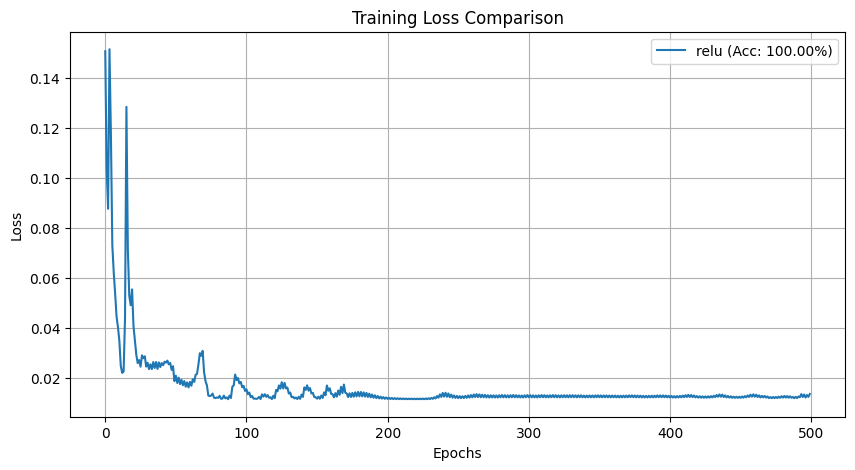

In [ ]:
import matplotlib.pyplot as plt

# Automatically use correct keys
activations = list(results.keys())

plt.figure(figsize=(10, 5))
for act in activations:
    plt.plot(results[act][0], label=f"{act} (Acc: {results[act][1]:.2f}%)")

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
